<a href="https://colab.research.google.com/github/Bharatgaur/Trading/blob/main/TRADE_PROBABILITIES_BASE_FILE_2%25RISK_Version_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import random
import matplotlib.pyplot as plt

BASE_CAPITAL = 25000
RISK_PERCENTAGE_TRADE = 0.02  # 2% of cumulative capital per trade
LOT_SIZE = 15  # 15 units per trade
RISK_POINTS = 20  # Points risked per trade
LOSS_PER_LOT = LOT_SIZE * RISK_POINTS  # Loss per lot = 15 * 20 = 300
REWARD_PER_LOT = LOT_SIZE * 2.5 * RISK_POINTS  # Reward = 15 * 50 = 750
REWARD_POINTS = 2.5*RISK_POINTS
TARGET_PCT = 40
STOPLOSS_PCT = 60
# Calculate Transaction Charges
brokerage = 0.01
transaction_charges_pct = 0.03503
stt_pct = 0.1
ipft_pct = 0.0005
stamp_duty_pct = 0.003
sebi_charges_pct = 0.0001
gst_pct = 0.18

# **ENTRY PRICE**

In [3]:


# Generate trade numbers from "TRADE 0001" to "TRADE 1000"
trade_numbers = [f"TRADE {str(i).zfill(4)}" for i in range(1, 1001)]

# Create a dictionary to hold data for all columns
data = {
    "TRADE NO": trade_numbers  # First column: Trade numbers
}

# Generate 1000 columns with random numbers between 100 and 500
for col_num in range(1, 1001):
    column_name = f"COLUMN_{col_num}"
    data[column_name] = [random.randint(300, 450) for _ in range(1000)]

# Create the DataFrame with 1001 columns
df = pd.DataFrame(data)

# Save the DataFrame to a single CSV file
df.to_csv('trade_entry.csv', index=False)

# Print confirmation message
print("CSV file 'trade_entry.csv' has been created.")

CSV file 'trade_entry.csv' has been created.


In [4]:
pd.read_csv('trade_entry.csv')

,TRADE NO,COLUMN_1,COLUMN_2,COLUMN_3,COLUMN_4,COLUMN_5,COLUMN_6,COLUMN_7,COLUMN_8,COLUMN_9,...,COLUMN_991,COLUMN_992,COLUMN_993,COLUMN_994,COLUMN_995,COLUMN_996,COLUMN_997,COLUMN_998,COLUMN_999,COLUMN_1000
0,TRADE 0001,350,309,314,366,348,372,331,406,362,...,370,387,439,376,330,399,380,450,374,419
1,TRADE 0002,376,339,346,420,335,411,438,402,445,...,309,392,356,402,331,428,346,361,313,397
2,TRADE 0003,359,404,314,301,345,387,400,356,311,...,430,317,416,357,429,384,356,387,306,333
3,TRADE 0004,370,389,363,427,330,336,341,420,334,...,329,439,424,373,359,366,433,363,359,390
4,TRADE 0005,395,425,331,330,386,336,366,427,314,...,392,372,391,343,350,429,304,432,371,354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,TRADE 0996,414,318,326,402,422,373,396,410,444,...,379,402,314,391,369,387,314,348,376,375
996,TRADE 0997,436,378,401,418,417,347,448,344,321,...,363,418,428,309,347,360,366,429,332,364
997,TRADE 0998,340,303,314,324,407,302,346,333,430,...,351,405,331,306,397,414,447,443,310,437
998,TRADE 0999,301,448,417,405,403,447,329,310,413,...,437,341,371,421,324,362,314,440,353,434


# **RANDOM TARGET AND STOPLOSS**

**40 % TARGET 60 % STOPLOSS**

**RISK:REWARD 1:2.5**

In [5]:

# Generate trade numbers from "TRADE 0001" to "TRADE 1000"
trade_numbers = [f"TRADE {str(i).zfill(4)}" for i in range(1, 1001)]

# Create a dictionary to hold data for all columns
data = {
    "TRADE NO": trade_numbers  # First column: Trade numbers
}

# Function to randomly assign "TARGET" (40%) or "STOPLOSS" (60%)
def assign_target_or_stoploss():
    return random.choices(["TARGET", "STOPLOSS"], weights=[TARGET_PCT, STOPLOSS_PCT], k=1)[0]

# Generate 1000 columns with "TARGET" or "STOPLOSS"
for col_num in range(1, 1001):
    column_name = f"COLUMN_{col_num}"
    data[column_name] = [assign_target_or_stoploss() for _ in range(1000)]

# Create the DataFrame with 1001 columns
df = pd.DataFrame(data)

# Save the DataFrame to a single CSV file
df.to_csv('target_stoploss.csv', index=False)

# Print confirmation message
print("CSV file 'target_stoploss' has been created.")


CSV file 'target_stoploss' has been created.


In [6]:
pd.read_csv('target_stoploss.csv')

,TRADE NO,COLUMN_1,COLUMN_2,COLUMN_3,COLUMN_4,COLUMN_5,COLUMN_6,COLUMN_7,COLUMN_8,COLUMN_9,...,COLUMN_991,COLUMN_992,COLUMN_993,COLUMN_994,COLUMN_995,COLUMN_996,COLUMN_997,COLUMN_998,COLUMN_999,COLUMN_1000
0,TRADE 0001,TARGET,TARGET,TARGET,TARGET,STOPLOSS,STOPLOSS,STOPLOSS,STOPLOSS,TARGET,...,TARGET,TARGET,STOPLOSS,STOPLOSS,STOPLOSS,TARGET,STOPLOSS,TARGET,STOPLOSS,STOPLOSS
1,TRADE 0002,STOPLOSS,TARGET,TARGET,STOPLOSS,STOPLOSS,STOPLOSS,TARGET,TARGET,STOPLOSS,...,STOPLOSS,TARGET,TARGET,TARGET,STOPLOSS,STOPLOSS,STOPLOSS,STOPLOSS,TARGET,STOPLOSS
2,TRADE 0003,TARGET,TARGET,TARGET,STOPLOSS,STOPLOSS,STOPLOSS,STOPLOSS,STOPLOSS,STOPLOSS,...,STOPLOSS,TARGET,TARGET,STOPLOSS,STOPLOSS,TARGET,STOPLOSS,TARGET,STOPLOSS,TARGET
3,TRADE 0004,STOPLOSS,STOPLOSS,STOPLOSS,TARGET,TARGET,TARGET,TARGET,TARGET,STOPLOSS,...,TARGET,STOPLOSS,STOPLOSS,TARGET,STOPLOSS,TARGET,TARGET,STOPLOSS,TARGET,STOPLOSS
4,TRADE 0005,TARGET,TARGET,TARGET,TARGET,TARGET,STOPLOSS,STOPLOSS,TARGET,STOPLOSS,...,TARGET,STOPLOSS,TARGET,STOPLOSS,STOPLOSS,TARGET,TARGET,STOPLOSS,STOPLOSS,STOPLOSS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,TRADE 0996,TARGET,TARGET,TARGET,STOPLOSS,TARGET,STOPLOSS,STOPLOSS,STOPLOSS,TARGET,...,TARGET,STOPLOSS,TARGET,STOPLOSS,STOPLOSS,STOPLOSS,STOPLOSS,STOPLOSS,STOPLOSS,STOPLOSS
996,TRADE 0997,TARGET,STOPLOSS,TARGET,TARGET,STOPLOSS,STOPLOSS,STOPLOSS,STOPLOSS,TARGET,...,TARGET,STOPLOSS,TARGET,STOPLOSS,STOPLOSS,TARGET,STOPLOSS,TARGET,STOPLOSS,STOPLOSS
997,TRADE 0998,TARGET,STOPLOSS,TARGET,TARGET,STOPLOSS,TARGET,TARGET,STOPLOSS,STOPLOSS,...,STOPLOSS,STOPLOSS,TARGET,STOPLOSS,STOPLOSS,STOPLOSS,TARGET,STOPLOSS,STOPLOSS,STOPLOSS
998,TRADE 0999,STOPLOSS,TARGET,STOPLOSS,TARGET,TARGET,STOPLOSS,STOPLOSS,STOPLOSS,STOPLOSS,...,TARGET,STOPLOSS,STOPLOSS,TARGET,STOPLOSS,STOPLOSS,STOPLOSS,TARGET,TARGET,STOPLOSS


In [16]:
# Load the CSV file
df_t = pd.read_csv('target_stoploss.csv')

# Exclude the "TRADE NO" column from the calculations (if it exists)
if "TRADE NO" in df_t.columns:
    df_t_excluded = df_t.drop(columns=["TRADE NO"])
else:
    df_t_excluded = df_t

# 1. Calculate the max value of count "TARGET" and its column name
max_target_column = df_t_excluded.apply(lambda col: (col == "TARGET").sum()).idxmax()  # Column with max "TARGET"
max_target_value = (df_t_excluded[max_target_column] == "TARGET").sum()  # Max count of "TARGET"
max_target_percentage = (max_target_value / len(df_t)) * 100  # Percentage of max "TARGET"
print(f"Max Count of 'TARGET': {max_target_percentage:.1f}% in Column: {max_target_column}")

# 2. Calculate the min value of count "TARGET" and its column name
min_target_column = df_t_excluded.apply(lambda col: (col == "TARGET").sum()).idxmin()  # Column with min "TARGET"
min_target_value = (df_t_excluded[min_target_column] == "TARGET").sum()  # Min count of "TARGET"
min_target_percentage = (min_target_value / len(df_t)) * 100  # Percentage of min "TARGET"
print(f"Min Count of 'TARGET': {min_target_percentage:.1f}% in Column: {min_target_column}")

# 3. Calculate the average value of count "TARGET" from all columns
target_counts = df_t_excluded.apply(lambda col: (col == "TARGET").sum())  # Count "TARGET" in each column
average_target_value = target_counts.mean()  # Average count of "TARGET"
average_target_percentage = (average_target_value / len(df_t)) * 100  # Percentage of average "TARGET"
print(f"Average Count of 'TARGET': {average_target_percentage:.2f}%")


Max Count of 'TARGET': 44.4% in Column: COLUMN_955
Min Count of 'TARGET': 35.4% in Column: COLUMN_270
Average Count of 'TARGET': 40.04%


In [17]:
column_name = 'COLUMN_199' # select column_name from COLUMN_1 to COLUMN_1000 COLUMN_888_CUM_PNL
# Count the frequency of "TARGET" and "STOPLOSS" in COLUMN_1
frequency = df_t[column_name].value_counts()/10

# Print the results
print(frequency)

COLUMN_199
STOPLOSS    60.3
TARGET      39.7
Name: count, dtype: float64


# **PnL**

In [8]:
# Load the two CSV files
entry_df = pd.read_csv('trade_entry.csv')
target_stoploss_df = pd.read_csv('target_stoploss.csv')

# Create an empty dictionary to hold the PnL data
pnl_data = {
    "TRADE NO": entry_df["TRADE NO"]  # Retain the "TRADE NO" column
}

# Iterate over each column (excluding "TRADE NO") to apply the PnL logic
for column in entry_df.columns[1:]:
    # Calculate PnL values for the column
    pnl_values = target_stoploss_df[column].apply(lambda x: (REWARD_POINTS if x == "TARGET" else -RISK_POINTS) * LOT_SIZE)

    # Create a Series with the base capital and concatenate it with PnL values
    base_series = pd.Series([BASE_CAPITAL])
    cumulative_pnl = pd.concat([base_series, pnl_values], ignore_index=True).cumsum()

    # Store the cumulative PnL in the dictionary (excluding the initial capital row)
    pnl_data[column] = cumulative_pnl.iloc[1:].values

# Create a DataFrame from the PnL data
pnl_df = pd.DataFrame(pnl_data)

# Save the modified PnL DataFrame to a new CSV file
pnl_df.to_csv('trade_pnl.csv', index=False)

# Print confirmation message
print("CSV file 'trade_pnl.csv' has been created with cumulative PnL and base capital added.")

CSV file 'trade_pnl.csv' has been created with cumulative PnL and base capital added.


In [9]:
pd.read_csv('trade_pnl.csv')

,TRADE NO,COLUMN_1,COLUMN_2,COLUMN_3,COLUMN_4,COLUMN_5,COLUMN_6,COLUMN_7,COLUMN_8,COLUMN_9,...,COLUMN_991,COLUMN_992,COLUMN_993,COLUMN_994,COLUMN_995,COLUMN_996,COLUMN_997,COLUMN_998,COLUMN_999,COLUMN_1000
0,TRADE 0001,25750.0,25750.0,25750.0,25750.0,24700.0,24700.0,24700.0,24700.0,25750.0,...,25750.0,25750.0,24700.0,24700.0,24700.0,25750.0,24700.0,25750.0,24700.0,24700.0
1,TRADE 0002,25450.0,26500.0,26500.0,25450.0,24400.0,24400.0,25450.0,25450.0,25450.0,...,25450.0,26500.0,25450.0,25450.0,24400.0,25450.0,24400.0,25450.0,25450.0,24400.0
2,TRADE 0003,26200.0,27250.0,27250.0,25150.0,24100.0,24100.0,25150.0,25150.0,25150.0,...,25150.0,27250.0,26200.0,25150.0,24100.0,26200.0,24100.0,26200.0,25150.0,25150.0
3,TRADE 0004,25900.0,26950.0,26950.0,25900.0,24850.0,24850.0,25900.0,25900.0,24850.0,...,25900.0,26950.0,25900.0,25900.0,23800.0,26950.0,24850.0,25900.0,25900.0,24850.0
4,TRADE 0005,26650.0,27700.0,27700.0,26650.0,25600.0,24550.0,25600.0,26650.0,24550.0,...,26650.0,26650.0,26650.0,25600.0,23500.0,27700.0,25600.0,25600.0,25600.0,24550.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,TRADE 0996,129400.0,152500.0,119950.0,109450.0,145150.0,139900.0,156700.0,130450.0,137800.0,...,132550.0,150400.0,140950.0,106300.0,184000.0,118900.0,158800.0,148300.0,171400.0,117850.0
996,TRADE 0997,130150.0,152200.0,120700.0,110200.0,144850.0,139600.0,156400.0,130150.0,138550.0,...,133300.0,150100.0,141700.0,106000.0,183700.0,119650.0,158500.0,149050.0,171100.0,117550.0
997,TRADE 0998,130900.0,151900.0,121450.0,110950.0,144550.0,140350.0,157150.0,129850.0,138250.0,...,133000.0,149800.0,142450.0,105700.0,183400.0,119350.0,159250.0,148750.0,170800.0,117250.0
998,TRADE 0999,130600.0,152650.0,121150.0,111700.0,145300.0,140050.0,156850.0,129550.0,137950.0,...,133750.0,149500.0,142150.0,106450.0,183100.0,119050.0,158950.0,149500.0,171550.0,116950.0


In [18]:
import pandas as pd

# Load the CSV file
df_no_charges = pd.read_csv('trade_pnl.csv')

# Get the last row as a DataFrame
last_row_df = df_no_charges.iloc[[-1]]

# Filter only numeric values from the last row
numeric_values = last_row_df.select_dtypes(include=['number'])

# Find the max and min values along with their corresponding column names
max_value = numeric_values.max(axis=1).values[0]  # Max value
max_column = numeric_values.idxmax(axis=1).values[0]  # Column name of max value

min_value = numeric_values.min(axis=1).values[0]  # Min value
min_column = numeric_values.idxmin(axis=1).values[0]  # Column name of min value


# Output the results
print(f"Max Capital: {max_value} in Column: {max_column}")
Max_Capital_growth_pct = (max_value * 100) / BASE_CAPITAL
print(f"Max Capital growth with 1 lot: {Max_Capital_growth_pct:.2f} %")

print(f"Min Capital: {min_value} in Column: {min_column}")
Min_Capital_growth_pct = (min_value * 100) / BASE_CAPITAL
print(f"Min Capital growth with 1 lot: {Min_Capital_growth_pct:.2f} %")


Max Capital: 191200.0 in Column: COLUMN_955
Max Capital growth with 1 lot: 764.80 %
Min Capital: 96700.0 in Column: COLUMN_270
Min Capital growth with 1 lot: 386.80 %


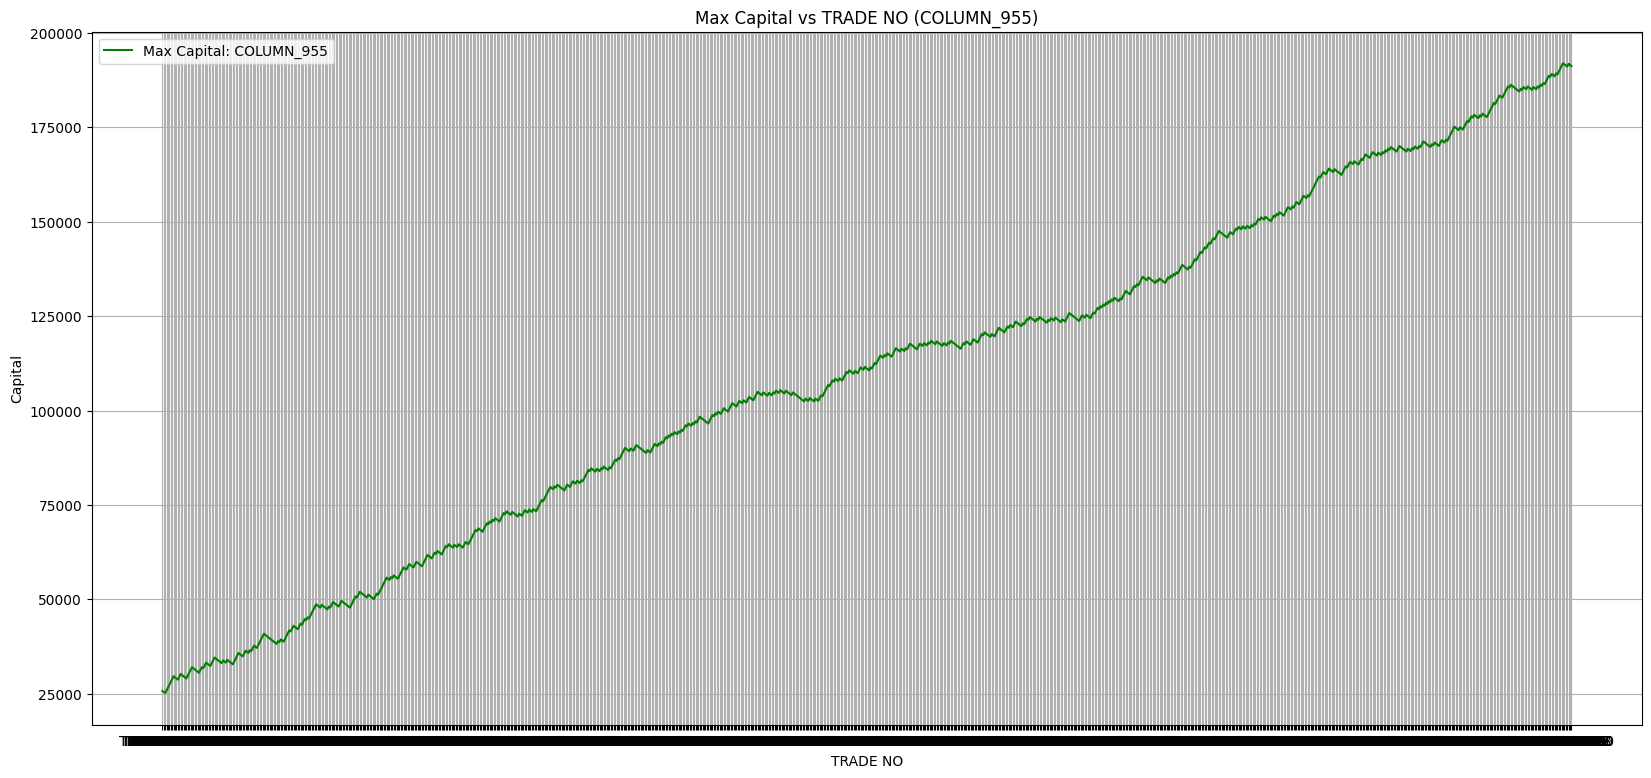

In [19]:
# Identify the max value column from the last row
last_row_df = df_no_charges.iloc[[-1]]
numeric_values = last_row_df.select_dtypes(include=['number'])
max_column = numeric_values.idxmax(axis=1).values[0]

# Plot max capital vs TRADE NO
fig, ax = plt.subplots(figsize=(20, 9))

# Set background color to white
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Plot with green line
ax.plot(df_no_charges['TRADE NO'],
        df_no_charges[max_column],
        label=f'Max Capital: {max_column}',
        color='green')

# Labels, title, legend, and grid
ax.set_xlabel('TRADE NO')
ax.set_ylabel('Capital')
ax.set_title(f'Max Capital vs TRADE NO ({max_column})')
ax.legend()
ax.grid(True)

# Show plot
plt.show()

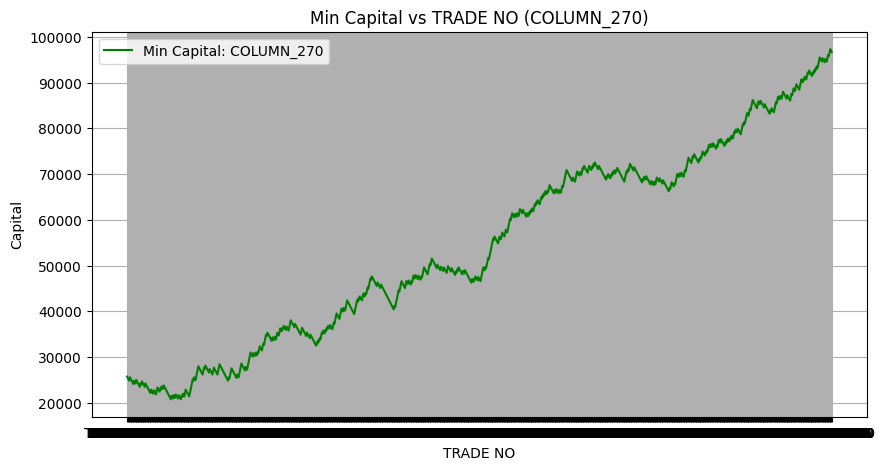

In [20]:
# Identify the min value column from the last row
last_row_df = df_no_charges.iloc[[-1]]
numeric_values = last_row_df.select_dtypes(include=['number'])
min_column = numeric_values.idxmin(axis=1).values[0]

# Plot min capital vs TRADE NO
plt.figure(figsize=(10, 5))
plt.plot(df_no_charges['TRADE NO'], df_no_charges[min_column], label=f'Min Capital: {min_column}', color='green')
plt.xlabel('TRADE NO')
plt.ylabel('Capital')
plt.title(f'Min Capital vs TRADE NO ({min_column})')
plt.legend()
plt.grid(True)
plt.show()

# **QUANTITY CALCULATION**

PnL without charges and lot qty based on 2% of capital

In [21]:
# Load entry and target/stoploss data
entry_df = pd.read_csv('trade_entry.csv')
target_stoploss_df = pd.read_csv('target_stoploss.csv')

# Create a dictionary to store the final PnL and QTY data
final_data = {"TRADE NO": entry_df["TRADE NO"]}  # Retain "TRADE NO"

# Iterate over each column (excluding "TRADE NO") to calculate cumulative PnL and QTY
for column in entry_df.columns[1:]:
    cumulative_capital = BASE_CAPITAL  # Initialize with BASE_CAPITAL
    pnl_column = []  # Store cumulative PnL values
    qty_column = []  # Store QTY values

    # Loop over each row to calculate QTY and update cumulative PnL
    for i in range(len(entry_df)):
        # Calculate the risk per trade
        risk_per_trade = cumulative_capital * RISK_PERCENTAGE_TRADE

        # Calculate entry price and lot size
        entry_price = entry_df[column].iloc[i]
        qty = int(risk_per_trade / LOSS_PER_LOT) if entry_price > 0 else 0  # Calculate QTY

        qty_column.append(qty)

        # Calculate PnL for the current trade based on target or stoploss
        pnl_value = (REWARD_POINTS if target_stoploss_df[column].iloc[i] == "TARGET" else -RISK_POINTS) * LOT_SIZE
        trade_pnl = qty * pnl_value  # Multiply QTY with PnL per trade

        # Update cumulative capital for the next row
        cumulative_capital += trade_pnl
        pnl_column.append(cumulative_capital)

    # Store the PnL and QTY values in the final data dictionary
    final_data[f"{column}_QTY"] = qty_column
    final_data[f"{column}_CUM_PNL"] = pnl_column

# Create a DataFrame from the final data
final_df = pd.DataFrame(final_data)

# Save the DataFrame to a single CSV file
final_df.to_csv('PnL_variable_lot.csv', index=False)

# Print confirmation message
print("CSV file 'PnL_variable_lot.csv' has been created with QTY and cumulative PnL.")

CSV file 'PnL_variable_lot.csv' has been created with QTY and cumulative PnL.


In [22]:
pd.read_csv('PnL_variable_lot.csv')

,TRADE NO,COLUMN_1_QTY,COLUMN_1_CUM_PNL,COLUMN_2_QTY,COLUMN_2_CUM_PNL,COLUMN_3_QTY,COLUMN_3_CUM_PNL,COLUMN_4_QTY,COLUMN_4_CUM_PNL,COLUMN_5_QTY,...,COLUMN_996_QTY,COLUMN_996_CUM_PNL,COLUMN_997_QTY,COLUMN_997_CUM_PNL,COLUMN_998_QTY,COLUMN_998_CUM_PNL,COLUMN_999_QTY,COLUMN_999_CUM_PNL,COLUMN_1000_QTY,COLUMN_1000_CUM_PNL
0,TRADE 0001,1,25750.0,1,25750.0,1,25750.0,1,25750.0,1,...,1,25750.0,1,24700.0,1,25750.0,1,24700.0,1,24700.0
1,TRADE 0002,1,25450.0,1,26500.0,1,26500.0,1,25450.0,1,...,1,25450.0,1,24400.0,1,25450.0,1,25450.0,1,24400.0
2,TRADE 0003,1,26200.0,1,27250.0,1,27250.0,1,25150.0,1,...,1,26200.0,1,24100.0,1,26200.0,1,25150.0,1,25150.0
3,TRADE 0004,1,25900.0,1,26950.0,1,26950.0,1,25900.0,1,...,1,26950.0,1,24850.0,1,25900.0,1,25900.0,1,24850.0
4,TRADE 0005,1,26650.0,1,27700.0,1,27700.0,1,26650.0,1,...,1,27700.0,1,25600.0,1,25600.0,1,25600.0,1,24550.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,TRADE 0996,590,9303850.0,2867,45155350.0,332,5235100.0,169,2493700.0,1823,...,306,4510300.0,4756,69919000.0,2216,32578450.0,10051,147757150.0,306,4498300.0
996,TRADE 0997,620,9768850.0,3010,44252350.0,349,5496850.0,166,2618200.0,1914,...,300,4735300.0,4661,68520700.0,2171,34206700.0,9850,144802150.0,299,4408600.0
997,TRADE 0998,651,10257100.0,2950,43367350.0,366,5771350.0,174,2748700.0,1876,...,315,4640800.0,4568,71946700.0,2280,33522700.0,9653,141906250.0,293,4320700.0
998,TRADE 0999,683,10052200.0,2891,45535600.0,384,5656150.0,183,2885950.0,1839,...,309,4548100.0,4796,70507900.0,2234,35198200.0,9460,149001250.0,288,4234300.0


In [23]:
# Load the data from the CSV file
df_QTY = pd.read_csv('PnL_variable_lot.csv')

# Get the last row
last_row = df_QTY.iloc[-1]

# Extract QTY values and find max and min along with their corresponding column names
qty_columns = [col for col in df_QTY.columns if col.endswith('_QTY')]
max_qty = last_row[qty_columns].max()
min_qty = last_row[qty_columns].min()
max_qty_column = last_row[qty_columns].idxmax()
min_qty_column = last_row[qty_columns].idxmin()

# Extract CUM_PNL values and find max and min along with their corresponding column names
capital_columns = [col for col in df_QTY.columns if col.endswith('_CUM_PNL')]
max_capital = last_row[capital_columns].max()
min_capital = last_row[capital_columns].min()
max_capital_column = last_row[capital_columns].idxmax()
min_capital_column = last_row[capital_columns].idxmin()

# Set your base capital (replace with your actual value)
BASE_CAPITAL = 100000

# Print QTY results
print(f"Max QTY: {max_qty:.0f} in Column: {max_qty_column}")
print(f"Min QTY: {min_qty:.0f} in Column: {min_qty_column}")

# Print Capital results
print(f"Max Capital: {max_capital:.0f} in Column: {max_capital_column}")
Max_Capital_growth_pct = (max_capital * 100) / BASE_CAPITAL
print(f"Max Capital growth with 1 lot: {Max_Capital_growth_pct:.2f} %")

print(f"Min Capital: {min_capital:.0f} in Column: {min_capital_column}")
Min_Capital_growth_pct = (min_capital * 100) / BASE_CAPITAL
print(f"Min Capital growth with 1 lot: {Min_Capital_growth_pct:.2f} %")


Max QTY: 39131 in Column: COLUMN_955_QTY
Min QTY: 74 in Column: COLUMN_677_QTY
Max Capital: 575234500 in Column: COLUMN_955_CUM_PNL
Max Capital growth with 1 lot: 575234.50 %
Min Capital: 1097200 in Column: COLUMN_677_CUM_PNL
Min Capital growth with 1 lot: 1097.20 %


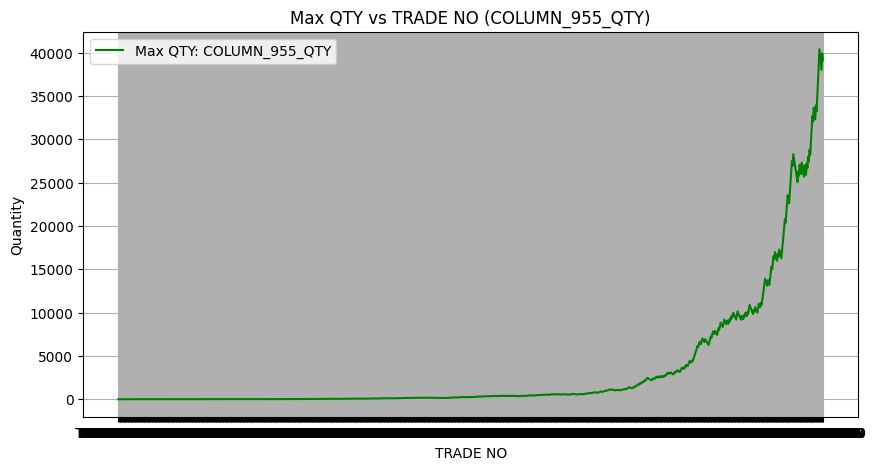

In [24]:
# Identify the column with max QTY
last_row = df_QTY.iloc[-1]
qty_columns = [col for col in df_QTY.columns if col.endswith('_QTY')]
max_qty_column = last_row[qty_columns].idxmax()

# Plot Max QTY vs TRADE NO
plt.figure(figsize=(10, 5))
plt.plot(df_QTY['TRADE NO'], df_QTY[max_qty_column], label=f'Max QTY: {max_qty_column}', color='green')
plt.xlabel('TRADE NO')
plt.ylabel('Quantity')
plt.title(f'Max QTY vs TRADE NO ({max_qty_column})')
plt.legend()
plt.grid(True)
plt.show()

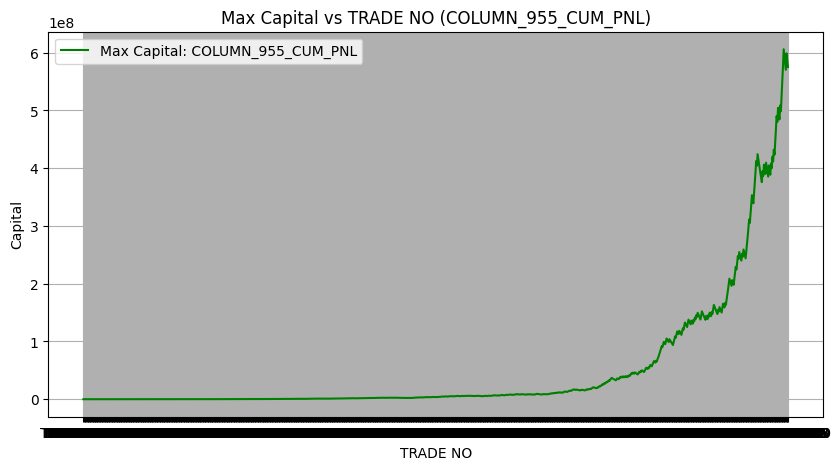

In [25]:
# Identify the column with max capital
capital_columns = [col for col in df_QTY.columns if col.endswith('_CUM_PNL')]
last_row = df_QTY.iloc[-1]
max_capital_column = last_row[capital_columns].idxmax()

# Plot Max Capital vs TRADE NO
plt.figure(figsize=(10, 5))
plt.plot(df_QTY['TRADE NO'], df_QTY[max_capital_column], label=f'Max Capital: {max_capital_column}', color='green')
plt.xlabel('TRADE NO')
plt.ylabel('Capital')
plt.title(f'Max Capital vs TRADE NO ({max_capital_column})')
plt.legend()
plt.grid(True)
plt.show()

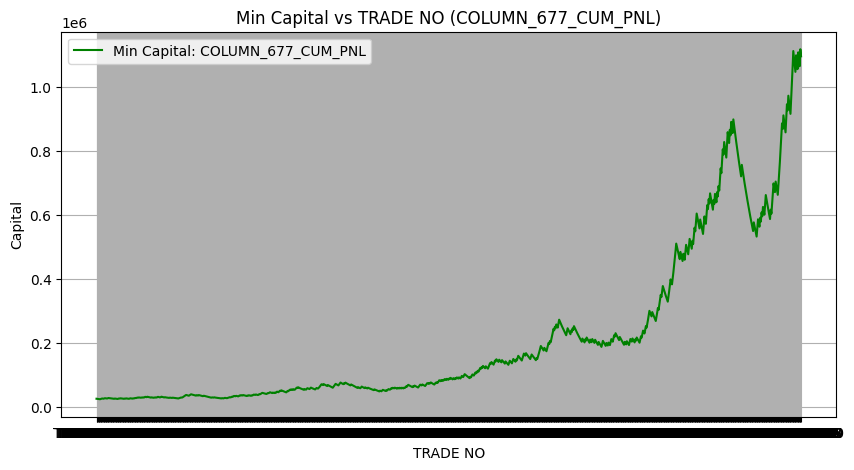

In [26]:
# Identify the column with min capital
capital_columns = [col for col in df_QTY.columns if col.endswith('_CUM_PNL')]
last_row = df_QTY.iloc[-1]
min_capital_column = last_row[capital_columns].idxmin()

# Plot Min Capital vs TRADE NO
plt.figure(figsize=(10, 5))
plt.plot(df_QTY['TRADE NO'], df_QTY[min_capital_column], label=f'Min Capital: {min_capital_column}', color='green')
plt.xlabel('TRADE NO')
plt.ylabel('Capital')
plt.title(f'Min Capital vs TRADE NO ({min_capital_column})')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
# Load the final_PnL.csv file
final_df = pd.read_csv('PnL_variable_lot.csv')

# Extract all columns containing QTY (columns ending with "_QTY")
qty_columns = [col for col in final_df.columns if col.endswith("_QTY")]

# Find the maximum QTY value across all QTY columns
max_qty = final_df[qty_columns].max().max()

print(f"The maximum QTY value is: {max_qty}")

The maximum QTY value is: 40404


In [28]:
# Load the final_PnL.csv file
final_df = pd.read_csv('PnL_variable_lot.csv')

# Extract all columns containing cumulative PnL (columns ending with "_CUM_PNL")
pnl_columns = [col for col in final_df.columns if col.endswith("_CUM_PNL")]

# Find the maximum PnL value across all PnL columns
max_pnl = final_df[pnl_columns].max().max()

print(f"The maximum PnL value is: {max_pnl}")

The maximum PnL value is: 606073000.0


In [30]:
import pandas as pd

# Load entry and target/stoploss data
entry_df = pd.read_csv('trade_entry.csv')
target_stoploss_df = pd.read_csv('target_stoploss.csv')

# Create a dictionary to store the final PnL and QTY data
final_data = {"TRADE NO": entry_df["TRADE NO"]}  # Retain "TRADE NO"

# Iterate over each column (excluding "TRADE NO") to calculate cumulative PnL and QTY
for column in entry_df.columns[1:]:
    cumulative_capital = BASE_CAPITAL  # Initialize with BASE_CAPITAL
    pnl_column = []  # Store cumulative PnL values
    qty_column = []  # Store QTY values

    # Loop over each row to calculate QTY and update cumulative PnL
    for i in range(len(entry_df)):
        # Extract entry price and target/stoploss information
        entry_price = entry_df[column].iloc[i]
        target_or_stoploss = target_stoploss_df[column].iloc[i]

        # Calculate the risk per trade based on the current cumulative capital
        risk_per_trade = cumulative_capital * RISK_PERCENTAGE_TRADE

        # Calculate QTY for the current trade dynamically
        qty = int(risk_per_trade / LOSS_PER_LOT) if entry_price > 0 else 0
        qty_column.append(qty)

        # Calculate Buy and Sell Values
        buy_value = entry_price * LOT_SIZE * qty
        sell_value = (entry_price + (REWARD_POINTS if target_or_stoploss == "TARGET" else -RISK_POINTS)) * LOT_SIZE * qty

        # Calculate Net PnL
        net_pnl = sell_value - buy_value

        # Calculate Transaction Charges
        transaction_charges_buy = transaction_charges_pct / 100 * buy_value
        transaction_charges_sell = transaction_charges_pct / 100 * sell_value
        stt = stt_pct / 100 * sell_value
        ipft = ipft_pct / 100 * (buy_value + sell_value)
        stamp_duty = stamp_duty_pct / 100 * (buy_value + sell_value)
        sebi_charges = sebi_charges_pct / 100 * (buy_value + sell_value)

        # Total Charges
        total_charges = (brokerage +
                         transaction_charges_buy +
                         transaction_charges_sell +
                         stt +
                         ipft +
                         stamp_duty +
                         sebi_charges)

        # GST Calculation
        gst = gst_pct * total_charges

        # Final PnL Calculation
        if net_pnl > 0:  # Profit scenario
            final_pnl = net_pnl - (total_charges + gst)
        else:  # Loss scenario
            final_pnl = net_pnl + (-total_charges - gst)

        # Update cumulative capital for the next row
        cumulative_capital += final_pnl
        pnl_column.append(cumulative_capital)

    # Store the QTY values as integers and cumulative PnL as floats in the final data dictionary
    final_data[f"{column}_QTY"] = qty_column
    final_data[f"{column}_CUM_PNL"] = pnl_column

# Create a DataFrame from the final data
final_df = pd.DataFrame(final_data)

# Format the cumulative PnL column to 2 decimal places
for column in entry_df.columns[1:]:
    final_df[f"{column}_CUM_PNL"] = final_df[f"{column}_CUM_PNL"].apply(lambda x: f"{float(x):.2f}")

# Save the DataFrame to a CSV file
final_df.to_csv('final_PnL_charges.csv', index=False)

# Print confirmation message
print("CSV file 'final_PnL_charges.csv' has been created with QTY as integers and cumulative PnL formatted to two decimal places.")

CSV file 'final_PnL_charges.csv' has been created with QTY as integers and cumulative PnL formatted to two decimal places.


In [31]:
pd.read_csv('final_PnL_charges.csv')

,TRADE NO,COLUMN_1_QTY,COLUMN_1_CUM_PNL,COLUMN_2_QTY,COLUMN_2_CUM_PNL,COLUMN_3_QTY,COLUMN_3_CUM_PNL,COLUMN_4_QTY,COLUMN_4_CUM_PNL,COLUMN_5_QTY,...,COLUMN_996_QTY,COLUMN_996_CUM_PNL,COLUMN_997_QTY,COLUMN_997_CUM_PNL,COLUMN_998_QTY,COLUMN_998_CUM_PNL,COLUMN_999_QTY,COLUMN_999_CUM_PNL,COLUMN_1000_QTY,COLUMN_1000_CUM_PNL
0,TRADE 0001,1,25737.78,1,25739.07,1,25738.91,1,25737.28,1,...,1,25736.24,1,24688.56,1,25734.64,1,24688.74,1,24687.33
1,TRADE 0002,1,25426.46,1,26477.19,1,26476.82,1,25424.58,1,...,1,25423.29,1,24378.18,1,25423.80,1,25427.69,1,24375.36
2,TRADE 0003,1,26163.96,1,27213.28,1,27215.72,1,25115.61,1,...,1,26160.01,1,24067.49,1,26160.41,1,25118.56,1,25113.67
3,TRADE 0004,1,25852.83,1,26901.55,1,26904.81,1,25850.98,1,...,1,26897.28,1,24802.67,1,25849.50,1,25856.06,1,24801.91
4,TRADE 0005,1,26589.20,1,27636.98,1,27643.19,1,26589.39,1,...,1,27632.59,1,25541.89,1,25536.43,1,25544.90,1,24491.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,TRADE 0996,300,4723484.11,1172,18454732.75,163,2578668.39,77,1142306.56,798,...,148,2175213.17,2093,30761003.07,1025,15069606.21,4726,69419002.87,144,2122137.05
996,TRADE 0997,314,4954303.50,1230,18071748.86,171,2704557.17,76,1198216.59,837,...,145,2282147.49,2050,30123468.42,1004,15807860.69,4627,67984976.39,141,2078295.94
997,TRADE 0998,330,5197878.34,1204,17699693.73,180,2837563.00,79,1256566.58,820,...,152,2234647.70,2008,31598843.37,1053,15477841.65,4532,66583521.06,138,2035071.55
998,TRADE 0999,346,5090980.54,1179,18565925.20,189,2778482.98,83,1317660.06,803,...,148,2188639.38,2106,30947329.08,1031,16235593.77,4438,69857423.63,135,1992799.53


In [36]:
# Load the data from the CSV file
df_QTY_C = pd.read_csv('final_PnL_charges.csv')

# Get the last row
last_row = df_QTY_C.iloc[-1]

# Extract QTY values and find max and min along with their corresponding column names
qty_columns = [col for col in df_QTY_C.columns if col.endswith('_QTY')]
max_qty = last_row[qty_columns].max()
min_qty = last_row[qty_columns].min()
max_qty_column = last_row[qty_columns].idxmax()
min_qty_column = last_row[qty_columns].idxmin()

# Extract CUM_PNL values and find max and min along with their corresponding column names
capital_columns = [col for col in df_QTY_C.columns if col.endswith('_CUM_PNL')]
max_capital = last_row[capital_columns].max()
min_capital = last_row[capital_columns].min()
max_capital_column = last_row[capital_columns].idxmax()
min_capital_column = last_row[capital_columns].idxmin()

# Print the results
print(f"Max QTY: {max_qty:.0f} in Column: {max_qty_column}")

# Output the results
print(f"Max Capital: {max_capital:.0f} in Column: {max_capital_column}")
Max_Capital_growth_pct = max_capital*100/BASE_CAPITAL
print(f"Max Capital growth with variable lot: {Max_Capital_growth_pct:.2f} %")

print(f"Min Capital: {min_capital:.0f} in Column: {min_capital_column}")
Min_Capital_growth_pct = min_capital*100/BASE_CAPITAL
print(f"Min Capital growth with variable lot: {Min_Capital_growth_pct:.2f} %")

Max QTY: 17297 in Column: COLUMN_940_QTY
Max Capital: 254086683 in Column: COLUMN_940_CUM_PNL
Max Capital growth with variable lot: 1016346.73 %
Min Capital: 558081 in Column: COLUMN_270_CUM_PNL
Min Capital growth with variable lot: 2232.32 %


In [35]:
# Load the final_PnL.csv file
final_df = pd.read_csv('final_PnL_charges.csv')

# Extract all columns containing QTY (columns ending with "_QTY")
qty_columns = [col for col in final_df.columns if col.endswith("_QTY")]

# Find the maximum QTY value across all QTY columns
max_qty = final_df[qty_columns].max().max()

print(f"The maximum QTY value is: {max_qty}")

The maximum QTY value is: 19380


In [33]:
# Load the final_PnL.csv file
final_df = pd.read_csv('final_PnL_charges.csv')

# Extract all columns containing cumulative PnL (columns ending with "_CUM_PNL")
pnl_columns = [col for col in final_df.columns if col.endswith("_CUM_PNL")]

# Find the maximum PnL value across all PnL columns
max_pnl = final_df[pnl_columns].max().max()

print(f"The maximum PnL value is: {max_pnl}")

The maximum PnL value is: 290707394.69


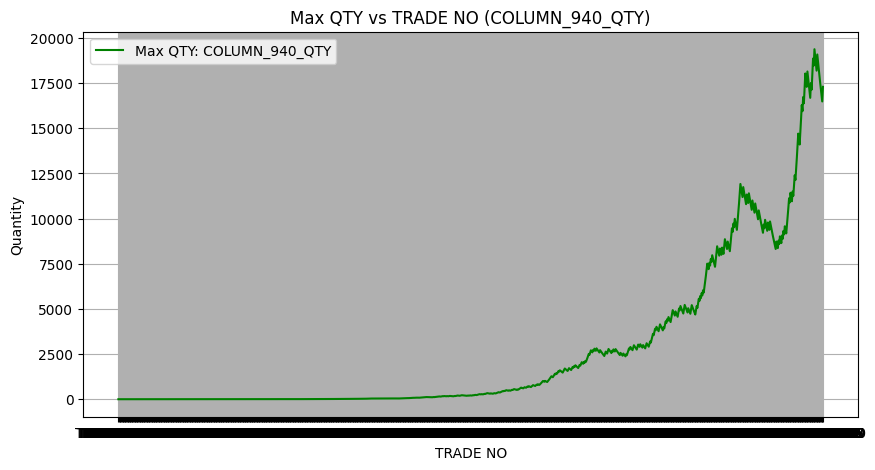

In [37]:
# Identify the column with max QTY from the last row
last_row = df_QTY_C.iloc[-1]
qty_columns = [col for col in df_QTY_C.columns if col.endswith('_QTY')]
max_qty_column = last_row[qty_columns].idxmax()

# Plot Max QTY vs TRADE NO
plt.figure(figsize=(10, 5))
plt.plot(df_QTY_C['TRADE NO'], df_QTY_C[max_qty_column], label=f'Max QTY: {max_qty_column}', color='green')
plt.xlabel('TRADE NO')
plt.ylabel('Quantity')
plt.title(f'Max QTY vs TRADE NO ({max_qty_column})')
plt.legend()
plt.grid(True)
plt.show()


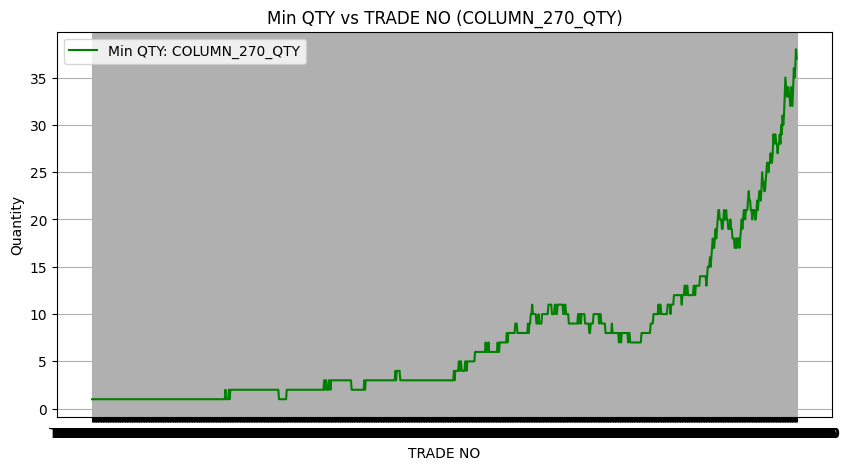

In [38]:
# Identify the column with min QTY from the last row
min_qty_column = last_row[qty_columns].idxmin()

# Plot Min QTY vs TRADE NO
plt.figure(figsize=(10, 5))
plt.plot(df_QTY_C['TRADE NO'], df_QTY_C[min_qty_column], label=f'Min QTY: {min_qty_column}', color='green')
plt.xlabel('TRADE NO')
plt.ylabel('Quantity')
plt.title(f'Min QTY vs TRADE NO ({min_qty_column})')
plt.legend()
plt.grid(True)
plt.show()

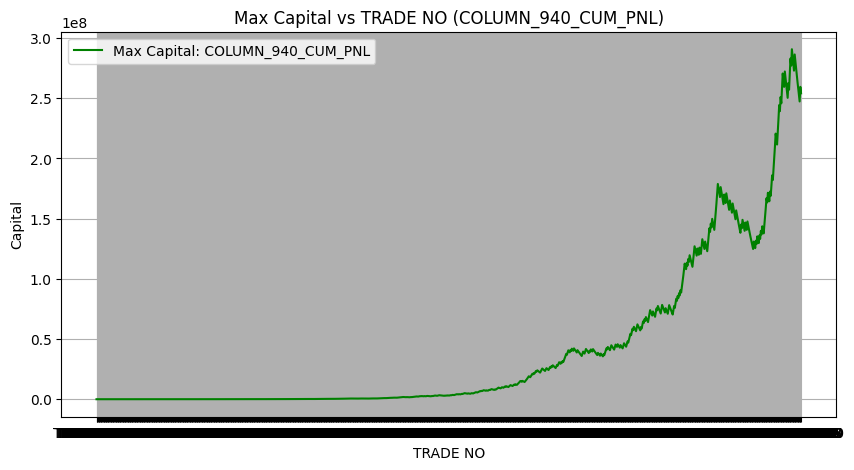

In [39]:
# Identify the column with max capital from the last row
capital_columns = [col for col in df_QTY_C.columns if col.endswith('_CUM_PNL')]
max_capital_column = last_row[capital_columns].idxmax()

# Plot Max Capital vs TRADE NO
plt.figure(figsize=(10, 5))
plt.plot(df_QTY_C['TRADE NO'], df_QTY_C[max_capital_column], label=f'Max Capital: {max_capital_column}', color='green')
plt.xlabel('TRADE NO')
plt.ylabel('Capital')
plt.title(f'Max Capital vs TRADE NO ({max_capital_column})')
plt.legend()
plt.grid(True)
plt.show()


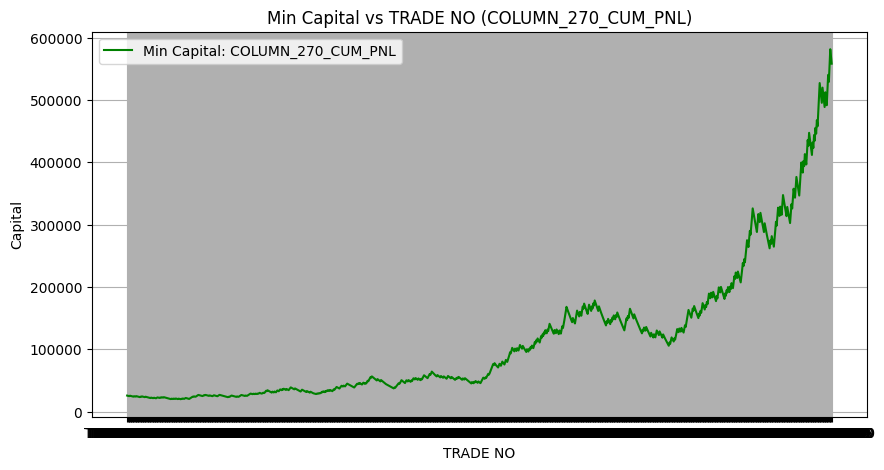

In [40]:
# Identify the column with min capital from the last row
min_capital_column = last_row[capital_columns].idxmin()

# Plot Min Capital vs TRADE NO
plt.figure(figsize=(10, 5))
plt.plot(df_QTY_C['TRADE NO'], df_QTY_C[min_capital_column], label=f'Min Capital: {min_capital_column}', color='green')
plt.xlabel('TRADE NO')
plt.ylabel('Capital')
plt.title(f'Min Capital vs TRADE NO ({min_capital_column})')
plt.legend()
plt.grid(True)
plt.show()


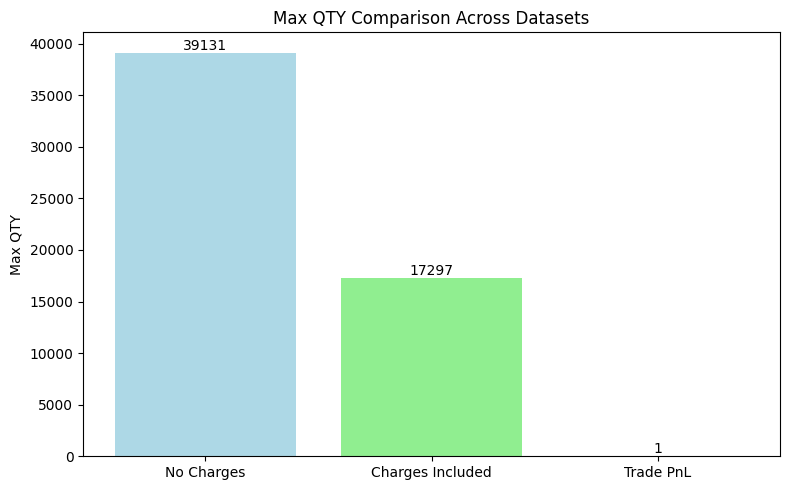

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

def get_summary_QTY(file_name):
    """
    Load data from a CSV file and find the maximum QTY from columns ending with '_QTY'.
    If no such columns are found, assume max quantity as 1.
    """
    df = pd.read_csv(file_name)

    # Get the last row of the DataFrame
    last_row = df.iloc[-1]

    # Identify columns that represent quantities (ending with '_QTY')
    qty_columns = [col for col in df.columns if col.endswith('_QTY')]

    # If QTY columns are present, find the max quantity; otherwise, assume max quantity as 1
    max_qty = last_row[qty_columns].max() if qty_columns else 1

    return max_qty

# Get Max QTY for the datasets
max_qty_no_charges = get_summary_QTY('PnL_variable_lot.csv')     # Without charges
max_qty_charges = get_summary_QTY('final_PnL_charges.csv')       # With charges

# For 'trade_pnl.csv', assume the max quantity as 1 (as per the requirement)
max_qty_additional = 1

# Prepare data for visualization
labels = ['No Charges', 'Charges Included', 'Trade PnL']
max_qty_values = [max_qty_no_charges, max_qty_charges, max_qty_additional]

# Create a bar chart to compare Max QTY across datasets
plt.figure(figsize=(8, 5))
plt.bar(labels, max_qty_values, color=['lightblue', 'lightgreen', 'salmon'])
plt.ylabel('Max QTY')
plt.title('Max QTY Comparison Across Datasets')

# Annotate bars with their respective values
for i, v in enumerate(max_qty_values):
    plt.text(i, v, f'{v:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


Max Capital (No Charges): 575234500.0
Max Capital (Charges Included): 254086683.02
Max Capital (Trade PnL): nan


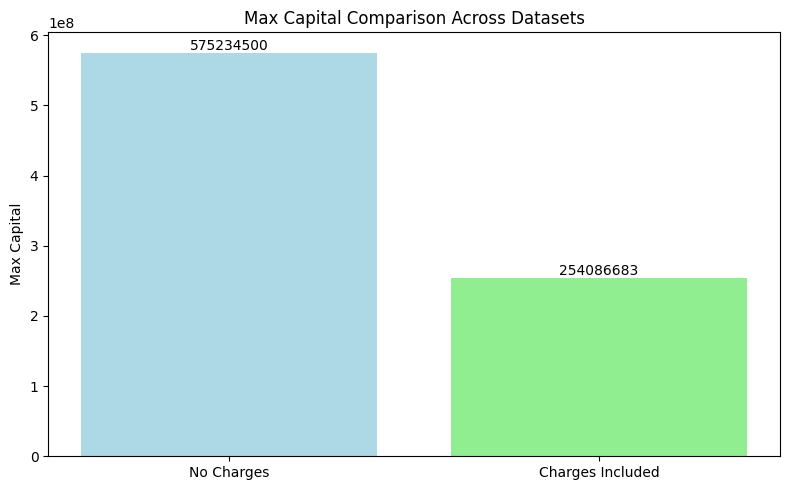

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

def get_summary_capital(file_name):
    """
    Load data from a CSV file and find the maximum cumulative capital (CUM_PNL).
    """
    # Load the data from the CSV file
    df = pd.read_csv(file_name)

    # Get the last row of the DataFrame
    last_row = df.iloc[-1]

    # Identify columns that represent cumulative capital (ending with '_CUM_PNL')
    capital_columns = [col for col in df.columns if col.endswith('_CUM_PNL')]

    # Find the maximum value in the cumulative capital columns
    max_capital = last_row[capital_columns].max()

    return max_capital

# Get Max Capital from the datasets
max_capital_no_charges = get_summary_capital('PnL_variable_lot.csv')  # No charges included
max_capital_charges = get_summary_capital('final_PnL_charges.csv')    # Charges included

# Load 'trade_pnl.csv' and assume lot quantity is 1
df_trade_pnl = pd.read_csv('trade_pnl.csv')

# Get the last row and extract numeric values to find the max capital
last_row_trade = df_trade_pnl.iloc[-1]

# Convert the Series to a DataFrame to use select_dtypes()
last_row_trade_df = last_row_trade.to_frame().T

# Extract numeric values and find the max capital
numeric_values_trade = last_row_trade_df.select_dtypes(include=['number'])
max_capital_trade = numeric_values_trade.max(axis=1).values[0]  # Get the max value

# Debugging: Print the max capital values
print(f"Max Capital (No Charges): {max_capital_no_charges}")
print(f"Max Capital (Charges Included): {max_capital_charges}")
print(f"Max Capital (Trade PnL): {max_capital_trade}")

# Prepare data for visualization
labels = ['No Charges', 'Charges Included', 'Trade PnL']
max_capital_values = [max_capital_no_charges, max_capital_charges, max_capital_trade]

# Create a bar chart to compare Max Capital across datasets
plt.figure(figsize=(8, 5))
plt.bar(labels, max_capital_values, color=['lightblue', 'lightgreen', 'salmon'])
plt.ylabel('Max Capital')
plt.title('Max Capital Comparison Across Datasets')

# Annotate bars with their respective values
for i, v in enumerate(max_capital_values):
    plt.text(i, v, f'{v:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


Last Row from trade_pnl.csv:
TRADE NO       TRADE 1000
COLUMN_1         130300.0
COLUMN_2         152350.0
COLUMN_3         121900.0
COLUMN_4         111400.0
                  ...    
COLUMN_996       118750.0
COLUMN_997       159700.0
COLUMN_998       149200.0
COLUMN_999       171250.0
COLUMN_1000      116650.0
Name: 999, Length: 1001, dtype: object
Min Capital (No Charges): 1097200.0
Min Capital (Charges Included): 558080.69
Min Capital (Trade PnL): 96700.0


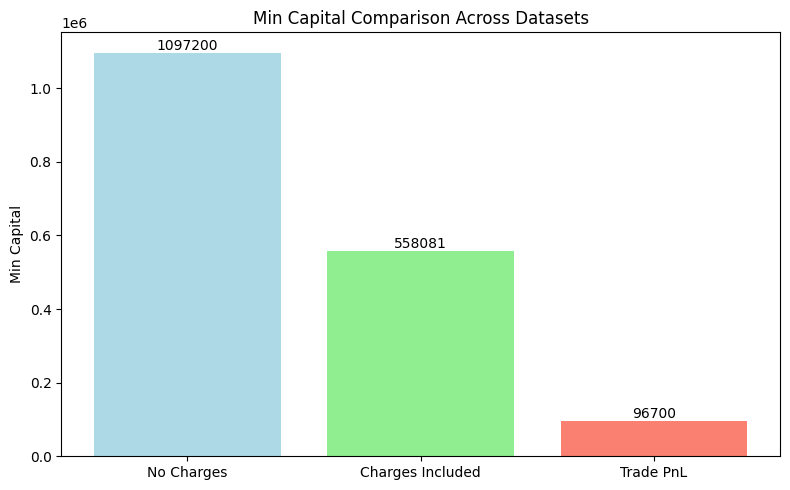

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

def get_summary_min_capital(file_name):
    """
    Load data from a CSV file and find the minimum cumulative capital (CUM_PNL).
    """
    # Load the data from the CSV file
    df = pd.read_csv(file_name)

    # Get the last row of the DataFrame
    last_row = df.iloc[-1]

    # Identify columns that represent cumulative capital (ending with '_CUM_PNL')
    capital_columns = [col for col in df.columns if col.endswith('_CUM_PNL')]

    # Find the minimum value in the cumulative capital columns
    min_capital = last_row[capital_columns].min()

    return min_capital

# Get Min Capital from the datasets
min_capital_no_charges = get_summary_min_capital('PnL_variable_lot.csv')  # No charges included
min_capital_charges = get_summary_min_capital('final_PnL_charges.csv')    # Charges included

# Load 'trade_pnl.csv' for additional output
df_trade_pnl = pd.read_csv('trade_pnl.csv')

# Get the last row
last_row_trade = df_trade_pnl.iloc[-1]
print("Last Row from trade_pnl.csv:")
print(last_row_trade)  # Print the last row to check its contents

# Convert all values to numeric, coercing errors to NaN
numeric_values_trade = pd.to_numeric(last_row_trade, errors='coerce')

# Get the minimum capital from the numeric values
min_capital_trade = numeric_values_trade.min() if not numeric_values_trade.isnull().all() else None  # Safely handle all NaN case

# Debugging: Print the min capital values
print(f"Min Capital (No Charges): {min_capital_no_charges}")
print(f"Min Capital (Charges Included): {min_capital_charges}")
print(f"Min Capital (Trade PnL): {min_capital_trade}")

# Prepare data for visualization
labels = ['No Charges', 'Charges Included', 'Trade PnL']
min_capital_values = [min_capital_no_charges, min_capital_charges, min_capital_trade]

# Create a bar chart to compare Min Capital across datasets
plt.figure(figsize=(8, 5))
plt.bar(labels, min_capital_values, color=['lightblue', 'lightgreen', 'salmon'])
plt.ylabel('Min Capital')
plt.title('Min Capital Comparison Across Datasets')

# Annotate bars with their respective values
for i, v in enumerate(min_capital_values):
    if pd.notna(v):  # Check if the value is not NaN
        plt.text(i, v, f'{v:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()